<a href="https://colab.research.google.com/github/KOCORA/Applied-Artificial-Intelligence/blob/master/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pip install fedot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 368.3/368.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.4/192.4 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 59.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━

In [1]:
pip install fedot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from fedot.core.data.data import InputData
from fedot.core.pipelines.node import PrimaryNode
from fedot.core.pipelines.pipeline import Pipeline
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.repository.tasks import TsForecastingParams, TaskTypesEnum, Task

In [3]:
FORECAST_HORIZON = 100
time_series_df_ver = []

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
def create_folder(save_path):
    """ Create folder for files """
    save_path = os.path.abspath(save_path)
    if os.path.isdir(save_path) is False:
        os.makedirs(save_path)

def make_forecast(time_series_df: pd.DataFrame):
    """ Train AutoML model and make forecasts """

    ar_model = Pipeline(PrimaryNode('ar'))

    task = Task(TaskTypesEnum.ts_forecasting,
                TsForecastingParams(forecast_length=FORECAST_HORIZON))

    # Prepare InputData for time series fitting
    time_series = np.array(time_series_df['ssh'])
    train_input = InputData(idx=np.arange(len(time_series)),
                            features=np.array(time_series),
                            target=np.array(time_series),
                            task=task,
                            data_type=DataTypesEnum.ts)
    predict_input = InputData(idx=np.arange(len(time_series) + FORECAST_HORIZON),
                              features=np.array(time_series),
                              target=np.array(time_series),
                              task=task,
                              data_type=DataTypesEnum.ts)

    ar_model.fit(train_input)
    predicted = ar_model.predict(predict_input)
    return np.ravel(predicted.predict)


def launch_forecasting(train_path: str, save_path: str):
    """ Create folder where predicted time series will be saved
    :param train_path: path with files with historical values
    :param save_path: folder where to save predictions
    """
    save_path = '/content/drive/MyDrive/Templates/save_data'   
    create_folder(save_path)
    train_path = '/content/drive/MyDrive/Templates/train_data'
    train_files = os.listdir(train_path)
    train_files.sort()

    for time_series_file in train_files:
        # Read_file and train model for time series
        time_series_df = pd.read_csv(os.path.join(train_path, time_series_file))

        forecast = make_forecast(time_series_df)

        # Generate datetime indices
        date_range = pd.date_range(start=time_series_df['datetime'].iloc[-1],
                                   freq='1H', periods=FORECAST_HORIZON + 1)
        forecast_df = pd.DataFrame({'ssh': forecast, 'datetime': date_range[1:]})
        forecast_df.to_csv(os.path.join(save_path, time_series_file), index=False)


if __name__ == '__main__':
    path = '../train'
    save = 'baseline_forecasts'
    launch_forecasting(path, save)

In [8]:
def smape(y_true, y_pred):
    return np.mean(100 *(2*np.abs((y_true - y_pred)) / (np.abs(y_true) + np.abs(y_pred))))

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


        ssh             datetime
0 -0.172450  2002-12-26 21:00:00
1 -0.119850  2002-12-26 22:00:00
2 -0.078339  2002-12-26 23:00:00
3 -0.044184  2002-12-27 00:00:00
4 -0.043120  2002-12-27 01:00:00
        ssh             datetime
0  0.031945  2002-10-29 13:00:00
1  0.089862  2002-10-29 14:00:00
2  0.096099  2002-10-29 15:00:00
3  0.082712  2002-10-29 16:00:00
4  0.082712  2002-10-29 17:00:00
2023-05-29 11:58:43,467 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


2023-05-29 11:58:43,627 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


2023-05-29 11:58:43,646 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


2023-05-29 11:58:43,662 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


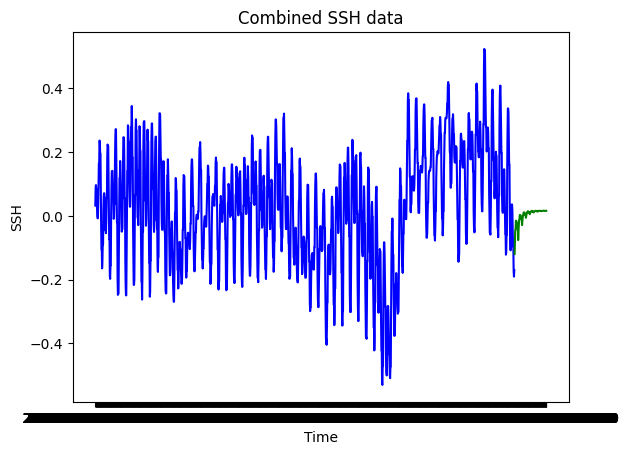

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


2023-05-29 11:58:52,357 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


2023-05-29 11:58:52,379 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


2023-05-29 11:58:52,394 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


2023-05-29 11:58:52,408 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


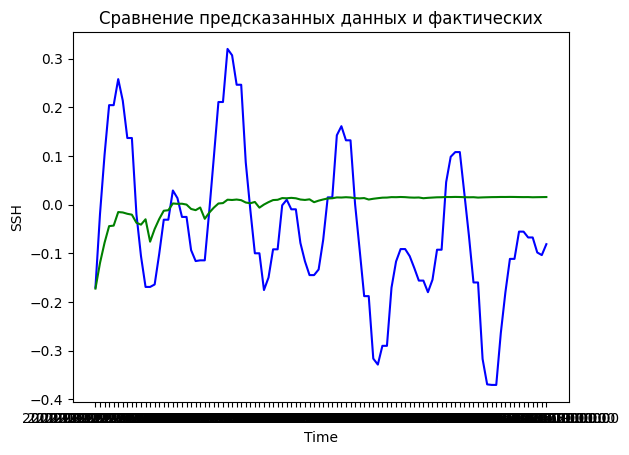

Значение метрики smape:  175.55717281946627


In [15]:
# загрузка данных из первого файла
data1 = pd.read_csv('/content/drive/MyDrive/Templates/save_data/71_111_height.csv')

# загрузка данных из второго файла
data2 = pd.read_csv('/content/drive/MyDrive/Templates/train_data/71_111_height.csv')

print(data1.head())
print(data2.head())

y_true = data2[:1300]
y_pred = data1
# объединение данных двух DataFrame
data = pd.concat([y_true, y_pred])

#df = pd.merge(df1, df2, on='datetime', how='outer')

# настройка графика и нанесение данных на график
plt.plot(data['datetime'][:1300], data['ssh'][:1300], color='blue', label='SSH from df1')
plt.plot(data['datetime'][1301:], data['ssh'][1301:], color='green', label='SSH from df2')
plt.xlabel('Time')
plt.ylabel('SSH')
plt.title('Combined SSH data')
#plt.legend()

plt.show()

plt.plot(data2['datetime'][1300:], data2['ssh'][1300:], color='blue', label='SSH true')
plt.plot(data2['datetime'][1300:], data1['ssh'], color='green', label='SSH pred')
plt.xlabel('Time')
plt.ylabel('SSH')
plt.title('Сравнение предсказанных данных и фактических')
#plt.legend()

plt.show()

print('Значение метрики smape: ', smape(y_true['ssh'], y_pred['ssh']))